In [5]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.cluster import KMeans

In [6]:
# reading the data and looking at the first five rows of the data
data=pd.read_csv("Item_recommendation.csv")
data.head()

,ItemLookupcode,Product_Line,Item_description,G,Ke,Ko,N,O,"Condiments, Sauces and seasonings",Cookies and Crackers,Cooking and baking,Health and Protein bars,Savoury and Salty Snacks,Sweeteners,unique_customers,sales,units,sales_rank
0,85,Nutilight - No Sugar Added Sweet Nut Spreads,Hazelnut Spread with Cocoa,1,1,1,1,0,0,0,0,0,0,0,194,1475832,192088,1
1,180,Swerve - Ultimate Sugar Replacement (Foodservi...,Bulk Icing Sugar Sweetener,1,1,1,1,0,0,0,0,0,0,1,92,975012,6872,2
2,2392,Nick's Sticks - 100% Grass-Fed Beef Sticks,Grass-Fed Nick's Sticks - Original Beef [25-Pack],1,1,0,1,0,0,0,0,0,1,0,167,968464,13172,3
3,8259,Swerve - Ultimate Sugar Replacement,Icing Sugar,1,1,1,1,0,0,0,0,0,0,1,195,964928,127412,4
4,8260,Swerve - Ultimate Sugar Replacement,Granular,1,1,1,1,0,0,0,0,0,0,1,193,943888,125124,5


In [7]:
# standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['G','Ke','Ko','N','O','Condiments, Sauces and seasonings','Cookies and Crackers ','Cooking and baking','Health and Protein bars ','Savoury and Salty Snacks','Sweeteners','unique_customers','sales','units','sales_rank']])

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,4.520000e+02,4.520000e+02,4.520000e+02,4.520000e+02,4.520000e+02,4.520000e+02,4.520000e+02,4.520000e+02,4.520000e+02,4.520000e+02,4.520000e+02,4.520000e+02,4.520000e+02,4.520000e+02,4.520000e+02
mean,-2.299046e-16,-2.976970e-16,-1.341110e-16,-1.273318e-15,-1.684985e-16,4.929685e-16,9.110215e-16,-1.569541e-16,-1.568313e-16,3.045745e-16,-5.843408e-16,-1.272335e-16,6.140614e-19,1.294441e-16,-3.045745e-17
std,1.001108e+00,1.001108e+00,1.001108e+00,1.001108e+00,1.001108e+00,1.001108e+00,1.001108e+00,1.001108e+00,1.001108e+00,1.001108e+00,1.001108e+00,1.001108e+00,1.001108e+00,1.001108e+00,1.001108e+00
min,-3.084093e+00,-1.548708e+00,-9.652067e-01,-1.806696e+00,-5.261522e-01,-3.949813e-01,-2.852012e-01,-4.098276e-01,-2.207349e-01,-2.520504e-01,-3.836771e-01,-9.439627e-01,-4.548832e-01,-4.030535e-01,-1.728223e+00
25%,3.242445e-01,-1.548708e+00,-9.652067e-01,5.534965e-01,-5.261522e-01,-3.949813e-01,-2.852012e-01,-4.098276e-01,-2.207349e-01,-2.520504e-01,-3.836771e-01,-7.149737e-01,-4.349297e-01,-3.873260e-01,-8.641115e-01
50%,3.242445e-01,6.456995e-01,-9.652067e-01,5.534965e-01,-5.261522e-01,-3.949813e-01,-2.852012e-01,-4.098276e-01,-2.207349e-01,-2.520504e-01,-3.836771e-01,-3.333253e-01,-3.698580e-01,-3.323947e-01,0.000000e+00
75%,3.242445e-01,6.456995e-01,1.036048e+00,5.534965e-01,-5.261522e-01,-3.949813e-01,-2.852012e-01,-4.098276e-01,-2.207349e-01,-2.520504e-01,-3.836771e-01,3.301557e-01,-7.920755e-02,-9.022884e-02,8.641115e-01
max,3.242445e-01,6.456995e-01,1.036048e+00,5.534965e-01,1.900591e+00,2.531765e+00,3.506297e+00,2.440050e+00,4.530321e+00,3.967460e+00,2.606358e+00,4.222969e+00,8.425558e+00,9.988940e+00,1.728223e+00


In [8]:
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
kmeans.inertia_

5862.364208413068

Text(0, 0.5, 'Inertia')

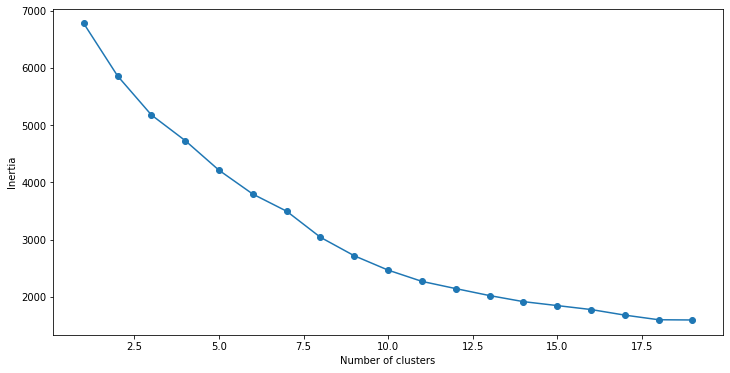

In [10]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [12]:
# k means using 4 clusters and k-means++ initialization
kmeans = KMeans(n_clusters =7, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [13]:
pred

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 6, 6, 4, 4, 0,
       4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 0, 6, 0, 5, 5, 5, 4, 0, 0, 6,
       4, 4, 4, 0, 5, 4, 0, 5, 0, 1, 5, 5, 4, 0, 0, 0, 4, 6, 5, 0, 0, 5,
       6, 5, 5, 1, 5, 5, 5, 5, 1, 2, 2, 5, 6, 5, 5, 0, 1, 5, 5, 0, 5, 5,
       5, 6, 5, 6, 2, 0, 5, 6, 5, 1, 5, 6, 5, 6, 1, 6, 1, 2, 5, 1, 5, 5,
       5, 5, 5, 5, 5, 6, 6, 5, 1, 5, 0, 1, 5, 1, 2, 5, 5, 5, 5, 5, 6, 5,
       1, 6, 5, 6, 2, 0, 5, 5, 1, 5, 5, 5, 1, 6, 5, 3, 5, 6, 5, 1, 2, 5,
       3, 5, 6, 5, 5, 5, 5, 5, 6, 3, 5, 6, 5, 1, 1, 5, 6, 6, 0, 6, 5, 1,
       5, 5, 5, 6, 6, 5, 5, 5, 1, 6, 5, 3, 5, 3, 6, 5, 5, 5, 5, 6, 3, 1,
       1, 5, 3, 5, 3, 5, 5, 5, 5, 5, 6, 1, 5, 5, 5, 1, 0, 0, 1, 6, 3, 5,
       0, 6, 5, 6, 0, 1, 5, 5, 6, 5, 5, 5, 5, 5, 5, 1, 1, 3, 5, 6, 5, 5,
       6, 5, 5, 5, 5, 6, 5, 6, 6, 5, 1, 1, 6, 5, 1, 5, 1, 1, 5, 5, 5, 0,
       1, 6, 5, 5, 5, 0, 5, 5, 1, 5, 5, 1, 5, 3, 1, 5, 6, 5, 3, 1, 1, 5,
       5, 3, 6, 2, 5, 6, 2, 1, 1, 1, 5, 2, 3, 3, 1,

In [14]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

5    173
1    110
6     54
4     36
0     32
2     26
3     21
Name: cluster, dtype: int64

In [15]:
data['cluster']=pred

In [16]:
data

,ItemLookupcode,Product_Line,Item_description,G,Ke,Ko,N,O,"Condiments, Sauces and seasonings",Cookies and Crackers,Cooking and baking,Health and Protein bars,Savoury and Salty Snacks,Sweeteners,unique_customers,sales,units,sales_rank,cluster
0,85,Nutilight - No Sugar Added Sweet Nut Spreads,Hazelnut Spread with Cocoa,1,1,1,1,0,0,0,0,0,0,0,194,1475832,192088,1,4
1,180,Swerve - Ultimate Sugar Replacement (Foodservi...,Bulk Icing Sugar Sweetener,1,1,1,1,0,0,0,0,0,0,1,92,975012,6872,2,4
2,2392,Nick's Sticks - 100% Grass-Fed Beef Sticks,Grass-Fed Nick's Sticks - Original Beef [25-Pack],1,1,0,1,0,0,0,0,0,1,0,167,968464,13172,3,4
3,8259,Swerve - Ultimate Sugar Replacement,Icing Sugar,1,1,1,1,0,0,0,0,0,0,1,195,964928,127412,4,4
4,8260,Swerve - Ultimate Sugar Replacement,Granular,1,1,1,1,0,0,0,0,0,0,1,193,943888,125124,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,6343,Snow Farms - Canadian-Grown Dried Fruit,Dried Cranberries with Pomegranate Flavour,1,0,1,1,0,0,0,0,0,0,0,4,152,104,448,5
448,B009,Blowholes - Eco-Friendly Paper Straws (Individ...,"Thick Bubble Tea Straws - White, Individually ...",0,1,0,0,0,0,0,0,0,0,0,4,132,20,449,1
449,481,Greeniche - Other Natural Supplements,VegeSlim Synergistic Weight Managment Aid,1,1,1,0,0,0,0,0,0,0,0,1,96,4,450,1
450,934,Greeniche Natural - Other,Fiberight Dietary Fibre Supplement,1,1,1,1,0,0,0,0,0,0,0,1,44,4,451,5


In [17]:
data[data['cluster']==0]

,ItemLookupcode,Product_Line,Item_description,G,Ke,Ko,N,O,"Condiments, Sauces and seasonings",Cookies and Crackers,Cooking and baking,Health and Protein bars,Savoury and Salty Snacks,Sweeteners,unique_customers,sales,units,sales_rank,cluster
21,5044,GluteNull Bakery - Low Carb Cookies in Clamshe...,Keto ChocoLin Flax Cookies,1,1,0,1,0,0,1,0,0,0,0,120,421448,67416,22,0
30,898,GluteNull Bakery - Low Carb Cookies in Clamshe...,Keto Hemp Cookies,1,1,0,1,0,0,1,0,0,0,0,108,348676,55332,31,0
34,8513,KZ Clean Eating - High Fibre Scandinavian Cris...,High Fibre Scandinavian Cracker - Tomato Onion,1,1,0,1,0,0,1,0,0,0,0,111,298156,40028,35,0
36,5043,GluteNull Bakery - Low Carb Cookies in Clamshe...,Keto Almond Cookies,1,1,0,1,0,0,1,0,0,0,0,77,288148,46048,37,0
41,2704,GluteNull Bakery - Organic Bars in Clamshell C...,Organic Raw Coco D'Lish Bar,1,1,0,1,1,0,1,0,0,0,0,50,239016,37456,42,0
42,8511,KZ Clean Eating - High Fibre Scandinavian Cris...,High Fibre Scandinavian Organic Crispbread - Chia,0,1,0,1,1,0,1,0,0,0,0,84,233896,31744,43,0
47,694,KZ Clean Eating - High Fibre Scandinavian Cris...,High Fibre Scandinavian Organic Crispbread,0,1,0,1,1,0,1,0,0,0,0,112,222240,30268,48,0
50,2305,GluteNull Bakery - Cookies in Clamshell Contai...,Ginger Square Gingerbread,1,0,0,1,0,0,1,0,0,0,0,45,203824,32132,51,0
52,2523,GluteNull Bakery - Organic Bars in Clamshell C...,Organic Raw Hemp Energy Bar,1,0,0,1,1,0,1,0,0,0,0,35,174176,27668,53,0
57,2705,GluteNull Bakery - Cookies in Clamshell Contai...,Goji Berries in Chocolate,1,0,0,1,0,0,1,0,0,0,0,37,145540,22968,58,0


In [22]:
data.to_excel('Item.xlsx')